# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [1]:
# Import all necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
# Read the input dataset and check out few records
credit_df = pd.read_csv('GermanCredit.csv')
credit_df.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


In [3]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
Duration                                  1000 non-null int64
Amount                                    1000 non-null int64
InstallmentRatePercentage                 1000 non-null int64
ResidenceDuration                         1000 non-null int64
Age                                       1000 non-null int64
NumberExistingCredits                     1000 non-null int64
NumberPeopleMaintenance                   1000 non-null int64
Telephone                                 1000 non-null int64
ForeignWorker                             1000 non-null int64
Class                                     1000 non-null object
CheckingAccountStatus.lt.0                1000 non-null int64
CheckingAccountStatus.0.to.200            1000 non-null int64
CheckingAccountStatus.gt.200              1000 non-null int64
CheckingAccountStatus.none                1000 non-null int64
CreditHistory.NoCredit.Al

In [4]:
# Understand the data 
credit_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
InstallmentRatePercentage,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
ResidenceDuration,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
NumberExistingCredits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
NumberPeopleMaintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0
Telephone,1000.0,0.596,0.490943,0.0,0.0,1.0,1.00,1.0
ForeignWorker,1000.0,0.963,0.188856,0.0,1.0,1.0,1.00,1.0
CheckingAccountStatus.lt.0,1000.0,0.274,0.446232,0.0,0.0,0.0,1.00,1.0


In [3]:
# Prepare the training and testing data
X = credit_df.drop('Class',axis=1)
y = credit_df['Class']

In [6]:
X.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,1,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,0,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,0,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,1,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,1,...,0,0,1,0,0,1,0,0,1,0


In [4]:
# Split the data into training and testing data.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Decision Tree

In [6]:
# Use Grid search to identify the best hyper parameters. 
param_grid = {
    
    'max_depth': [5,10,20,40,60,80, 90, 100, 110],
    'max_features': ["sqrt", "log2",None],
    'min_samples_leaf': [2,3, 4, 5,6],
    'min_samples_split': [3,5,8, 10, 12,14,16],
    }
# Create a base model
dt_clf = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search_dt = GridSearchCV(estimator = dt_clf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 1)

In [7]:
# Train the model.
grid_search_dt.fit(X_train,y_train)

Fitting 5 folds for each of 945 candidates, totalling 4725 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 1050 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 4050 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 4725 out of 4725 | elapsed:   15.5s finished
C:\Users\sriga\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, 40, 60, 80, 90, 100, 110],
                         'max_features': ['sqrt', 'log2', Non

In [8]:
# Best parameters based on training data
grid_search_dt.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 6,
 'min_samples_split': 8}

In [9]:
# Best score based on training data. 
grid_search_dt.best_score_

0.7225

In [10]:
# Build a Decision Tree Classifier model based on the tuned parameters 
dt_clf = DecisionTreeClassifier(max_depth=10,max_features='log2',min_samples_leaf=6,min_samples_split=8)

In [11]:
# Train the model. 
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [12]:
# Predict the class for testing set.
y_predict_dt = dt_clf.predict(X_test)

In [13]:
print(classification_report(y_test,y_predict_dt))

              precision    recall  f1-score   support

         Bad       0.51      0.42      0.46        59
        Good       0.77      0.83      0.80       141

    accuracy                           0.71       200
   macro avg       0.64      0.63      0.63       200
weighted avg       0.70      0.71      0.70       200



In [20]:
print(confusion_matrix(y_test,y_predict_dt,labels=['Bad','Good']))

[[ 25  34]
 [ 24 117]]


In [15]:
print(accuracy_score(y_test,y_predict_dt))

0.71


### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [90]:
! pip install dtreeviz --user

  Using cached https://files.pythonhosted.org/packages/23/e4/110c4096d8010308d36a83a841899bf97111c0bc80733e8e2899f3854897/dtreeviz-0.5.tar.gz
  Created wheel for dtreeviz: filename=dtreeviz-0.5-cp36-none-any.whl size=18573 sha256=b378a606eb323f28b28ac4229666a5198e39360c417efaa6a7a2ffbd934d2a2b
  Stored in directory: /home/ubuntu/.cache/pip/wheels/3b/50/6b/c9e82550ad7ab31b18a974df0683385eb20dd4e922fe316048
Successfully built dtreeviz
ERROR: mxnet-cu80 1.2.0 has requirement graphviz<0.9.0,>=0.8.1, but you'll have graphviz 0.11.1 which is incompatible.
ERROR: mxnet-cu80 1.2.0 has requirement numpy<1.15.0,>=1.8.2, but you'll have numpy 1.17.0 which is incompatible.


If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

In [21]:
# import necessary libraries
from sklearn import tree
from dtreeviz.trees import *

In [8]:
# convert class labels to 0 and 1
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train_b = lb.fit_transform(y_train)
y_test_b = lb.fit_transform(y_test)

In [24]:
np.unique(y_train_b)

array([0, 1])

In [25]:
#visualize the tree
viz = dtreeviz(dt_clf,
               X_train,
               y_train_b.ravel(),
               target_name = 'Class',
               feature_names=X_train.columns.values,
               class_names= ['Good','Bad']
               )
viz.view()

## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [5]:
from sklearn.ensemble import RandomForestClassifier
rf_reg = RandomForestClassifier(random_state=42)

In [81]:
#Original params_grid
params_grid = {"max_depth": [3,10,20,50],
               "bootstrap":[True,False],
               "n_estimators":[1000,1500,1750,2000],
               "criterion":['gini','entropy'],
               'min_samples_split':[2,5,10],
               'min_samples_leaf':[1,2,4]
    
}

In [82]:
grid_search_rf = GridSearchCV(estimator = rf_reg,param_grid=params_grid,n_jobs=-1,cv=10,verbose=1)

In [83]:
grid_search_rf.fit(X_train,y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 41.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 58.9min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 82.3min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 106.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 133.1min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 162.0min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 189.3min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 10, 20, 50], 'bootstrap': [True, False], 'n_estimators': [1000, 1500, 1750, 2000], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [42]:
# Display the best params that was selected
grid_search_rf.best_score_

0.75375000000000003

In [6]:
# Building the randocm forest classifier model with tuned parameters.
rf_clf = RandomForestClassifier(n_estimators = 1500, criterion='gini',max_depth=10, bootstrap='True',random_state=42)

In [7]:
# Fit the model.
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap='True', class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [8]:
# Run the predictions
y_predict_rf_clf = rf_clf.predict(X_test)

In [15]:
# Classification report
print(classification_report(y_test,y_predict_rf_clf))

              precision    recall  f1-score   support

         Bad       0.77      0.39      0.52        59
        Good       0.79      0.95      0.86       141

    accuracy                           0.79       200
   macro avg       0.78      0.67      0.69       200
weighted avg       0.78      0.79      0.76       200



In [16]:
# Confusion matrix.
print(confusion_matrix(y_test,y_predict_rf_clf,labels=['Bad','Good']))

[[ 23  36]
 [  7 134]]


In [17]:
# Display the feature importance.
rf_clf.feature_importances_

array([0.07633581, 0.09964569, 0.03235697, 0.0287012 , 0.08097699,
       0.01849014, 0.00914264, 0.01450978, 0.00352204, 0.04323783,
       0.01738166, 0.00738048, 0.05857198, 0.01860828, 0.01306143,
       0.01251521, 0.00897318, 0.02531608, 0.02060113, 0.00899457,
       0.01059651, 0.01433614, 0.00212909, 0.00415485, 0.0111431 ,
       0.        , 0.00092005, 0.0097683 , 0.00275373, 0.01791508,
       0.00857782, 0.00673353, 0.00613827, 0.01365208, 0.01322772,
       0.01315782, 0.01082449, 0.01293654, 0.01123051, 0.00640666,
       0.01355029, 0.01525113, 0.00672433, 0.        , 0.01032028,
       0.0065467 , 0.00791021, 0.0151864 , 0.01081181, 0.01268932,
       0.01304788, 0.01508621, 0.00588765, 0.01602018, 0.01154872,
       0.01835744, 0.00895832, 0.00227889, 0.00943496, 0.01298979,
       0.01247411])

As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

In [18]:
# Visualize feature importatnce.
import numpy as np
import matplotlib.pyplot as plt
importances = rf_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [19]:
importances

array([0.07633581, 0.09964569, 0.03235697, 0.0287012 , 0.08097699,
       0.01849014, 0.00914264, 0.01450978, 0.00352204, 0.04323783,
       0.01738166, 0.00738048, 0.05857198, 0.01860828, 0.01306143,
       0.01251521, 0.00897318, 0.02531608, 0.02060113, 0.00899457,
       0.01059651, 0.01433614, 0.00212909, 0.00415485, 0.0111431 ,
       0.        , 0.00092005, 0.0097683 , 0.00275373, 0.01791508,
       0.00857782, 0.00673353, 0.00613827, 0.01365208, 0.01322772,
       0.01315782, 0.01082449, 0.01293654, 0.01123051, 0.00640666,
       0.01355029, 0.01525113, 0.00672433, 0.        , 0.01032028,
       0.0065467 , 0.00791021, 0.0151864 , 0.01081181, 0.01268932,
       0.01304788, 0.01508621, 0.00588765, 0.01602018, 0.01154872,
       0.01835744, 0.00895832, 0.00227889, 0.00943496, 0.01298979,
       0.01247411])

Feature ranking:
1. feature 1 (0.099646)
2. feature 4 (0.080977)
3. feature 0 (0.076336)
4. feature 12 (0.058572)
5. feature 9 (0.043238)
6. feature 2 (0.032357)
7. feature 3 (0.028701)
8. feature 17 (0.025316)
9. feature 18 (0.020601)
10. feature 13 (0.018608)
11. feature 5 (0.018490)
12. feature 55 (0.018357)
13. feature 29 (0.017915)
14. feature 10 (0.017382)
15. feature 53 (0.016020)
16. feature 41 (0.015251)
17. feature 47 (0.015186)
18. feature 51 (0.015086)
19. feature 7 (0.014510)
20. feature 21 (0.014336)
21. feature 33 (0.013652)
22. feature 40 (0.013550)
23. feature 34 (0.013228)
24. feature 35 (0.013158)
25. feature 14 (0.013061)
26. feature 50 (0.013048)
27. feature 59 (0.012990)
28. feature 37 (0.012937)
29. feature 49 (0.012689)
30. feature 15 (0.012515)
31. feature 60 (0.012474)
32. feature 54 (0.011549)
33. feature 38 (0.011231)
34. feature 24 (0.011143)
35. feature 36 (0.010824)
36. feature 48 (0.010812)
37. feature 20 (0.010597)
38. feature 44 (0.010320)
39. feature 

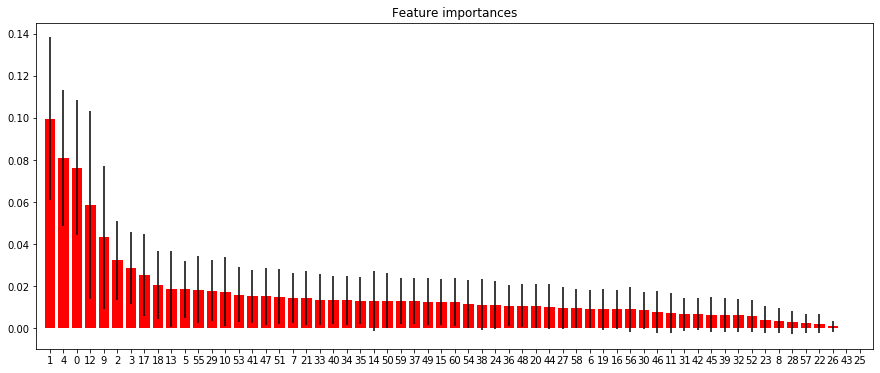

In [20]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(15,6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [10]:
! pip install pdpbox

    100% |████████████████████████████████| 57.7MB 1.1MB/s eta 0:00:01    23% |███████▋                        | 13.8MB 40.0MB/s eta 0:00:02
  Running setup.py bdist_wheel for pdpbox ... done
  Stored in directory: /home/ubuntu/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox
pyspark 2.4.0 requires py4j==0.10.7, which is not installed.
You are using pip version 10.0.1, however version 19.2.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

In [11]:
import pdpbox
from pdpbox import pdp

import matplotlib.pyplot as plt

In [12]:
# Your code here!

pdp_pedi_df = pdp.pdp_interact(rf_clf,X_train,X_train.columns,['Duration','Amount'])

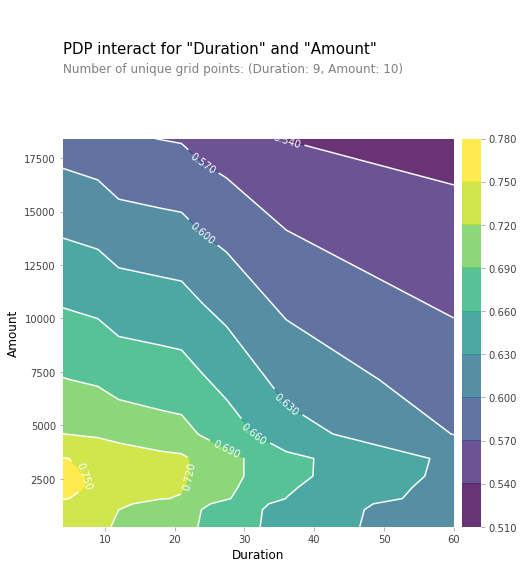

In [13]:
pdp.pdp_interact_plot(pdp_pedi_df, ['Duration','Amount'])
pdp.plt.show()

## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [16]:
! conda install -c anaconda py-xgboost

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.4
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base conda



NotWritableError: The current user does not have write permissions to a required path.
  path: /usr/local/anaconda/pkgs/conda-4.5.4-py36_0/info/repodata_record.json
  uid: 12574
  gid: 12574

If you feel that permissions on this path are set incorrectly, you can manually
change them by executing

  $ sudo chown 12574:12574 /usr/local/anaconda/pkgs/conda-4.5.4-py36_0/info/repodata_record.json

In general, it's not advisable to use 'sudo conda'.




! conda install -c conda-forge lightgbm

Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)

## XGBoost

In [9]:
import xgboost as xgb

In [11]:
# Convert input data into DMatrix format which helps in faster processing.
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train_b.ravel())
data_dmatrix

In [12]:
X_train_dmatrix = xgb.DMatrix(X_train)

In [104]:
# Gridsearch parameters
params_xg_cf = {  
    "booster":['gbtree'],
    "n_estimators": [1450,1550,1650,2000],
    "max_depth": [5,7,10,],
    "learning_rate": [0.05,0.01,0.1,0.3],
    "colsample_bytree": [0.8,0.5],
    "subsample": [0.8,1.0],
    "gamma": [0,0.1,0.3],
    'reg_alpha': [1],
    "min_child_weight": [1],
    "objective":["reg:logistic"]
}
xgbclf = xgb.XGBClassifier(nthreads=-1) 

In [105]:
grid_search_xgclf = GridSearchCV(estimator=xgbclf,param_grid=params_xg_cf,
scoring='roc_auc', cv=5, verbose=1)


In [106]:
# Fit the model.
grid_search_xgclf.fit(X_train,y_train_b.ravel())

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=1)]: Done 2880 out of 2880 | elapsed: 81.4min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, nthreads=-1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'booster': ['gbtree'], 'n_estimators': [1450, 1550, 1650, 2000], 'max_depth': [5, 7, 10], 'learning_rate': [0.05, 0.01, 0.1, 0.3], 'colsample_bytree': [0.8, 0.5], 'subsample': [0.8, 1.0], 'gamma': [0, 0.1, 0.3], 'reg_alpha': [1], 'min_child_weight': [1], 'objective': ['reg:logistic']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [107]:
grid_search_xgclf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.1, learning_rate=0.01,
       max_delta_step=0, max_depth=7, min_child_weight=1, missing=None,
       n_estimators=1450, n_jobs=1, nthread=None, nthreads=-1,
       objective='reg:logistic', random_state=0, reg_alpha=1, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=True, subsample=0.8)

In [108]:
# Best Parameters
grid_search_xgclf.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.5,
 'gamma': 0.1,
 'learning_rate': 0.01,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 1450,
 'objective': 'reg:logistic',
 'reg_alpha': 1,
 'subsample': 0.8}

In [109]:
# Best training score
grid_search_xgclf.best_score_

0.7815986825473433

In [13]:
# Following are the tuned parameters
tuned_parms = {   "booster":'gbtree',
    "n_estimators": 1450,
    "max_depth": 7,
    "learning_rate": 0.01,
    "colsample_bytree": 0.8,
    "subsample": 0.8,
    "gamma": 0.1,
    'reg_alpha': 1,
    "min_child_weight": 1,
    "objective":"reg:logistic"
}

In [14]:
# Perform cross validation with early stopping.
cv_xgb = xgb.cv(params = tuned_parms, dtrain = data_dmatrix, num_boost_round = 3000, nfold = 5,
                metrics = ['error'], # Make sure you enter metrics inside a list or you may encounter issues!
                early_stopping_rounds = 100)

In [15]:
 cv_xgb.tail(5)

,train-error-mean,train-error-std,test-error-mean,test-error-std
51,0.128437,0.010430,0.25875,0.035925
52,0.130313,0.009911,0.26250,0.035576
53,0.129688,0.010174,0.26250,0.038120
54,0.129062,0.010486,0.25750,0.038202
55,0.128750,0.008420,0.25625,0.040117


In [16]:
#Build final model with optimum boosting rounds
final_xgb = xgb.train(tuned_parms,data_dmatrix,num_boost_round=55)

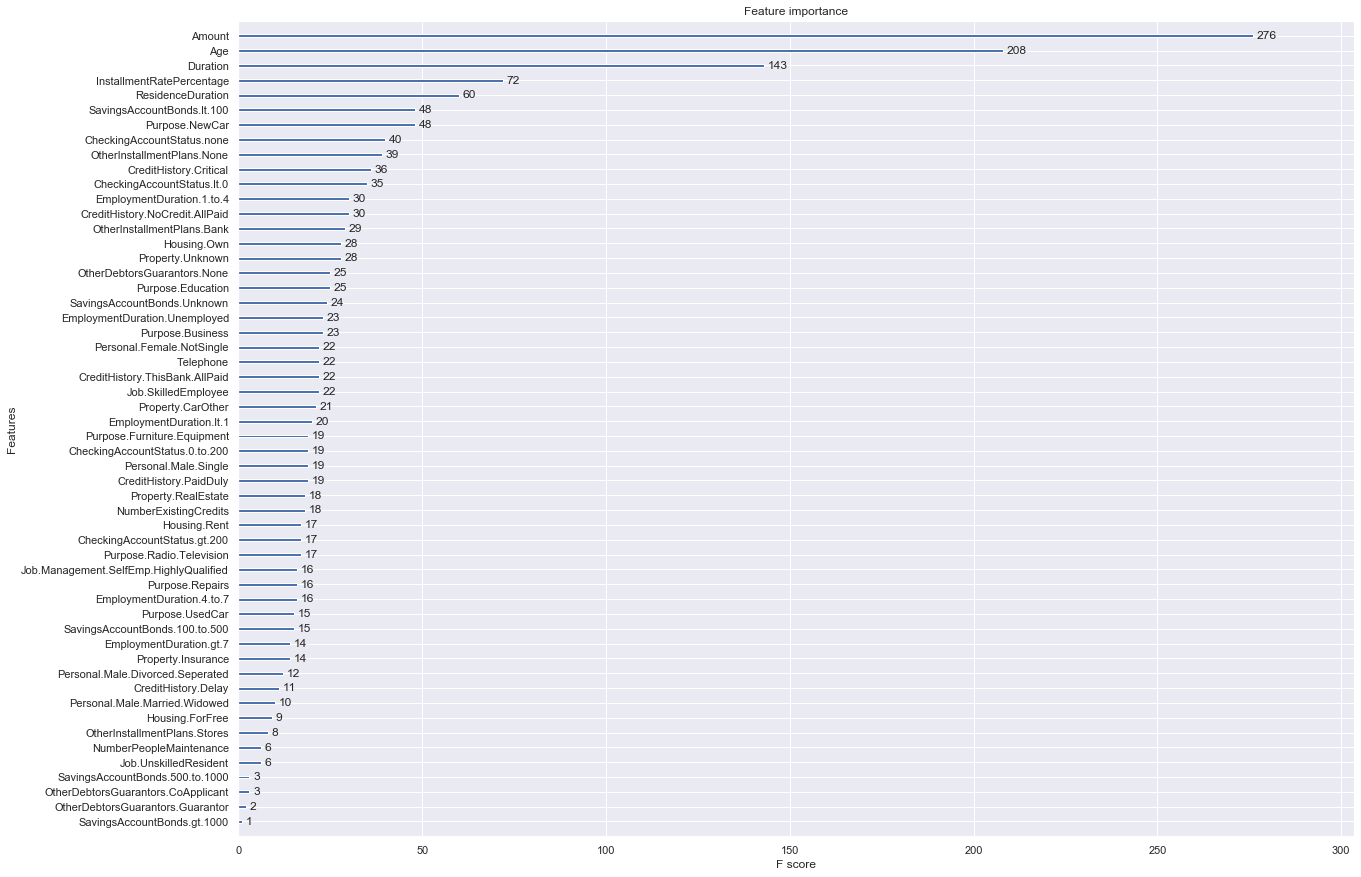

In [17]:
# Visualize the feature importance.
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale = 1)
plt.rcParams['figure.figsize'] = [20, 15]
xgb.plot_importance(final_xgb)

In [18]:
testdmat = xgb.DMatrix(X_test)

In [19]:
# Predict the class for testing data set. We need to round the predictions to nearest whole number i.e. 0 or 1.
y_xgb_pred = final_xgb.predict(testdmat)
predictions = [round(value) for value in y_xgb_pred]

In [20]:
print(classification_report(y_test_b.ravel(),predictions))

              precision    recall  f1-score   support

           0       0.77      0.39      0.52        59
           1       0.79      0.95      0.86       141

    accuracy                           0.79       200
   macro avg       0.78      0.67      0.69       200
weighted avg       0.78      0.79      0.76       200



In [27]:
# Confusion matrix.
print(confusion_matrix(y_test_b.ravel(),predictions))

[[ 23  36]
 [  7 134]]


## CATBOOST

In [29]:
! pip install catboost

In [32]:
import catboost
from catboost import CatBoostClassifier, Pool

In [33]:
# Build the model.
model = CatBoostClassifier(iterations=1500,
                           depth=6,
                           learning_rate=0.01,
                           loss_function='Logloss',
                           verbose=True
                           )

In [34]:
# Fit the model
model.fit(X_train,y_train_b.ravel())

0:	learn: 0.6902230	total: 77.3ms	remaining: 1m 55s
1:	learn: 0.6859400	total: 132ms	remaining: 1m 39s
2:	learn: 0.6824415	total: 177ms	remaining: 1m 28s
3:	learn: 0.6791494	total: 224ms	remaining: 1m 23s
4:	learn: 0.6754969	total: 274ms	remaining: 1m 21s
5:	learn: 0.6717686	total: 325ms	remaining: 1m 20s
6:	learn: 0.6686205	total: 375ms	remaining: 1m 20s
7:	learn: 0.6654304	total: 422ms	remaining: 1m 18s
8:	learn: 0.6627405	total: 455ms	remaining: 1m 15s
9:	learn: 0.6593625	total: 505ms	remaining: 1m 15s
10:	learn: 0.6566613	total: 583ms	remaining: 1m 18s
11:	learn: 0.6542080	total: 646ms	remaining: 1m 20s
12:	learn: 0.6509505	total: 696ms	remaining: 1m 19s
13:	learn: 0.6476642	total: 751ms	remaining: 1m 19s
14:	learn: 0.6446615	total: 814ms	remaining: 1m 20s
15:	learn: 0.6418446	total: 862ms	remaining: 1m 19s
16:	learn: 0.6395249	total: 915ms	remaining: 1m 19s
17:	learn: 0.6370063	total: 979ms	remaining: 1m 20s
18:	learn: 0.6351621	total: 1.03s	remaining: 1m 20s
19:	learn: 0.6332396	

160:	learn: 0.4759268	total: 7.7s	remaining: 1m 4s
161:	learn: 0.4752593	total: 7.75s	remaining: 1m 4s
162:	learn: 0.4749499	total: 7.8s	remaining: 1m 3s
163:	learn: 0.4745615	total: 7.84s	remaining: 1m 3s
164:	learn: 0.4741509	total: 7.89s	remaining: 1m 3s
165:	learn: 0.4734855	total: 7.94s	remaining: 1m 3s
166:	learn: 0.4733046	total: 7.96s	remaining: 1m 3s
167:	learn: 0.4725742	total: 8.01s	remaining: 1m 3s
168:	learn: 0.4721739	total: 8.05s	remaining: 1m 3s
169:	learn: 0.4715229	total: 8.09s	remaining: 1m 3s
170:	learn: 0.4708751	total: 8.14s	remaining: 1m 3s
171:	learn: 0.4700281	total: 8.19s	remaining: 1m 3s
172:	learn: 0.4691983	total: 8.24s	remaining: 1m 3s
173:	learn: 0.4686534	total: 8.28s	remaining: 1m 3s
174:	learn: 0.4679140	total: 8.33s	remaining: 1m 3s
175:	learn: 0.4670776	total: 8.38s	remaining: 1m 3s
176:	learn: 0.4663499	total: 8.43s	remaining: 1m 2s
177:	learn: 0.4661187	total: 8.46s	remaining: 1m 2s
178:	learn: 0.4655622	total: 8.51s	remaining: 1m 2s
179:	learn: 0.

323:	learn: 0.4097173	total: 15.2s	remaining: 55.3s
324:	learn: 0.4091692	total: 15.3s	remaining: 55.3s
325:	learn: 0.4089442	total: 15.3s	remaining: 55.3s
326:	learn: 0.4086389	total: 15.4s	remaining: 55.3s
327:	learn: 0.4083299	total: 15.4s	remaining: 55.2s
328:	learn: 0.4080902	total: 15.5s	remaining: 55.2s
329:	learn: 0.4078729	total: 15.5s	remaining: 55.1s
330:	learn: 0.4076923	total: 15.6s	remaining: 55s
331:	learn: 0.4072921	total: 15.6s	remaining: 55s
332:	learn: 0.4072568	total: 15.7s	remaining: 54.8s
333:	learn: 0.4069306	total: 15.7s	remaining: 54.8s
334:	learn: 0.4066938	total: 15.7s	remaining: 54.8s
335:	learn: 0.4062191	total: 15.8s	remaining: 54.7s
336:	learn: 0.4060232	total: 15.8s	remaining: 54.6s
337:	learn: 0.4058979	total: 15.9s	remaining: 54.6s
338:	learn: 0.4056060	total: 15.9s	remaining: 54.5s
339:	learn: 0.4054109	total: 16s	remaining: 54.5s
340:	learn: 0.4050059	total: 16s	remaining: 54.4s
341:	learn: 0.4047359	total: 16.1s	remaining: 54.4s
342:	learn: 0.404448

484:	learn: 0.3692134	total: 22.7s	remaining: 47.6s
485:	learn: 0.3689989	total: 22.8s	remaining: 47.6s
486:	learn: 0.3687936	total: 22.8s	remaining: 47.5s
487:	learn: 0.3685679	total: 22.9s	remaining: 47.5s
488:	learn: 0.3684416	total: 23s	remaining: 47.5s
489:	learn: 0.3683134	total: 23s	remaining: 47.5s
490:	learn: 0.3681788	total: 23.1s	remaining: 47.4s
491:	learn: 0.3680051	total: 23.1s	remaining: 47.4s
492:	learn: 0.3676404	total: 23.2s	remaining: 47.4s
493:	learn: 0.3673525	total: 23.2s	remaining: 47.3s
494:	learn: 0.3673343	total: 23.3s	remaining: 47.3s
495:	learn: 0.3670266	total: 23.3s	remaining: 47.2s
496:	learn: 0.3667849	total: 23.4s	remaining: 47.2s
497:	learn: 0.3666308	total: 23.4s	remaining: 47.2s
498:	learn: 0.3664482	total: 23.5s	remaining: 47.1s
499:	learn: 0.3662587	total: 23.6s	remaining: 47.1s
500:	learn: 0.3661826	total: 23.6s	remaining: 47.1s
501:	learn: 0.3659815	total: 23.7s	remaining: 47s
502:	learn: 0.3658105	total: 23.7s	remaining: 47s
503:	learn: 0.365527

644:	learn: 0.3401500	total: 30.4s	remaining: 40.4s
645:	learn: 0.3399440	total: 30.5s	remaining: 40.3s
646:	learn: 0.3398905	total: 30.5s	remaining: 40.3s
647:	learn: 0.3398613	total: 30.6s	remaining: 40.2s
648:	learn: 0.3395449	total: 30.6s	remaining: 40.1s
649:	learn: 0.3395181	total: 30.7s	remaining: 40.1s
650:	learn: 0.3393695	total: 30.7s	remaining: 40.1s
651:	learn: 0.3393393	total: 30.8s	remaining: 40s
652:	learn: 0.3391445	total: 30.8s	remaining: 40s
653:	learn: 0.3390056	total: 30.9s	remaining: 39.9s
654:	learn: 0.3388953	total: 30.9s	remaining: 39.9s
655:	learn: 0.3388037	total: 31s	remaining: 39.8s
656:	learn: 0.3386023	total: 31s	remaining: 39.8s
657:	learn: 0.3384605	total: 31.1s	remaining: 39.8s
658:	learn: 0.3383411	total: 31.1s	remaining: 39.7s
659:	learn: 0.3382100	total: 31.2s	remaining: 39.7s
660:	learn: 0.3381012	total: 31.2s	remaining: 39.6s
661:	learn: 0.3378962	total: 31.3s	remaining: 39.6s
662:	learn: 0.3376807	total: 31.3s	remaining: 39.5s
663:	learn: 0.337537

805:	learn: 0.3147749	total: 38.2s	remaining: 32.9s
806:	learn: 0.3147494	total: 38.2s	remaining: 32.8s
807:	learn: 0.3147199	total: 38.3s	remaining: 32.8s
808:	learn: 0.3145905	total: 38.3s	remaining: 32.7s
809:	learn: 0.3144702	total: 38.4s	remaining: 32.7s
810:	learn: 0.3143206	total: 38.4s	remaining: 32.6s
811:	learn: 0.3139269	total: 38.5s	remaining: 32.6s
812:	learn: 0.3138917	total: 38.5s	remaining: 32.5s
813:	learn: 0.3136103	total: 38.5s	remaining: 32.5s
814:	learn: 0.3135205	total: 38.6s	remaining: 32.4s
815:	learn: 0.3133577	total: 38.6s	remaining: 32.4s
816:	learn: 0.3130787	total: 38.7s	remaining: 32.3s
817:	learn: 0.3129705	total: 38.7s	remaining: 32.3s
818:	learn: 0.3126952	total: 38.8s	remaining: 32.3s
819:	learn: 0.3124542	total: 38.8s	remaining: 32.2s
820:	learn: 0.3121810	total: 38.9s	remaining: 32.2s
821:	learn: 0.3120561	total: 38.9s	remaining: 32.1s
822:	learn: 0.3119278	total: 39s	remaining: 32.1s
823:	learn: 0.3117502	total: 39s	remaining: 32s
824:	learn: 0.3115

964:	learn: 0.2903902	total: 46.2s	remaining: 25.6s
965:	learn: 0.2902908	total: 46.2s	remaining: 25.6s
966:	learn: 0.2901221	total: 46.3s	remaining: 25.5s
967:	learn: 0.2899996	total: 46.3s	remaining: 25.5s
968:	learn: 0.2897519	total: 46.4s	remaining: 25.4s
969:	learn: 0.2896046	total: 46.4s	remaining: 25.4s
970:	learn: 0.2895018	total: 46.5s	remaining: 25.3s
971:	learn: 0.2894038	total: 46.5s	remaining: 25.3s
972:	learn: 0.2893869	total: 46.6s	remaining: 25.2s
973:	learn: 0.2892836	total: 46.6s	remaining: 25.2s
974:	learn: 0.2892471	total: 46.7s	remaining: 25.1s
975:	learn: 0.2892061	total: 46.7s	remaining: 25.1s
976:	learn: 0.2891289	total: 46.8s	remaining: 25s
977:	learn: 0.2889779	total: 46.8s	remaining: 25s
978:	learn: 0.2889349	total: 46.8s	remaining: 24.9s
979:	learn: 0.2886986	total: 46.9s	remaining: 24.9s
980:	learn: 0.2885078	total: 46.9s	remaining: 24.8s
981:	learn: 0.2883556	total: 47s	remaining: 24.8s
982:	learn: 0.2882257	total: 47s	remaining: 24.7s
983:	learn: 0.288084

1123:	learn: 0.2709460	total: 54s	remaining: 18.1s
1124:	learn: 0.2708075	total: 54s	remaining: 18s
1125:	learn: 0.2705876	total: 54.1s	remaining: 18s
1126:	learn: 0.2705752	total: 54.1s	remaining: 17.9s
1127:	learn: 0.2705294	total: 54.2s	remaining: 17.9s
1128:	learn: 0.2704506	total: 54.2s	remaining: 17.8s
1129:	learn: 0.2704395	total: 54.3s	remaining: 17.8s
1130:	learn: 0.2702569	total: 54.3s	remaining: 17.7s
1131:	learn: 0.2701449	total: 54.4s	remaining: 17.7s
1132:	learn: 0.2698580	total: 54.4s	remaining: 17.6s
1133:	learn: 0.2696413	total: 54.5s	remaining: 17.6s
1134:	learn: 0.2694628	total: 54.5s	remaining: 17.5s
1135:	learn: 0.2692127	total: 54.5s	remaining: 17.5s
1136:	learn: 0.2691972	total: 54.6s	remaining: 17.4s
1137:	learn: 0.2691323	total: 54.6s	remaining: 17.4s
1138:	learn: 0.2689499	total: 54.7s	remaining: 17.3s
1139:	learn: 0.2689073	total: 54.8s	remaining: 17.3s
1140:	learn: 0.2688818	total: 54.8s	remaining: 17.2s
1141:	learn: 0.2687452	total: 54.9s	remaining: 17.2s
1

1281:	learn: 0.2517047	total: 1m 1s	remaining: 10.5s
1282:	learn: 0.2516642	total: 1m 1s	remaining: 10.4s
1283:	learn: 0.2516447	total: 1m 1s	remaining: 10.4s
1284:	learn: 0.2514226	total: 1m 1s	remaining: 10.4s
1285:	learn: 0.2513896	total: 1m 1s	remaining: 10.3s
1286:	learn: 0.2513250	total: 1m 1s	remaining: 10.3s
1287:	learn: 0.2511216	total: 1m 2s	remaining: 10.2s
1288:	learn: 0.2509751	total: 1m 2s	remaining: 10.2s
1289:	learn: 0.2508623	total: 1m 2s	remaining: 10.1s
1290:	learn: 0.2508303	total: 1m 2s	remaining: 10.1s
1291:	learn: 0.2506162	total: 1m 2s	remaining: 10s
1292:	learn: 0.2504369	total: 1m 2s	remaining: 9.97s
1293:	learn: 0.2503227	total: 1m 2s	remaining: 9.93s
1294:	learn: 0.2501913	total: 1m 2s	remaining: 9.88s
1295:	learn: 0.2501723	total: 1m 2s	remaining: 9.84s
1296:	learn: 0.2501431	total: 1m 2s	remaining: 9.8s
1297:	learn: 0.2499761	total: 1m 2s	remaining: 9.76s
1298:	learn: 0.2498402	total: 1m 2s	remaining: 9.72s
1299:	learn: 0.2497411	total: 1m 2s	remaining: 9.

1437:	learn: 0.2359467	total: 1m 10s	remaining: 3.05s
1438:	learn: 0.2358048	total: 1m 10s	remaining: 3s
1439:	learn: 0.2357257	total: 1m 10s	remaining: 2.95s
1440:	learn: 0.2357075	total: 1m 10s	remaining: 2.9s
1441:	learn: 0.2357024	total: 1m 10s	remaining: 2.85s
1442:	learn: 0.2355793	total: 1m 11s	remaining: 2.81s
1443:	learn: 0.2355408	total: 1m 11s	remaining: 2.76s
1444:	learn: 0.2354978	total: 1m 11s	remaining: 2.71s
1445:	learn: 0.2354350	total: 1m 11s	remaining: 2.66s
1446:	learn: 0.2351753	total: 1m 11s	remaining: 2.61s
1447:	learn: 0.2350322	total: 1m 11s	remaining: 2.56s
1448:	learn: 0.2348859	total: 1m 11s	remaining: 2.51s
1449:	learn: 0.2346598	total: 1m 11s	remaining: 2.46s
1450:	learn: 0.2345351	total: 1m 11s	remaining: 2.42s
1451:	learn: 0.2343814	total: 1m 11s	remaining: 2.37s
1452:	learn: 0.2342751	total: 1m 11s	remaining: 2.32s
1453:	learn: 0.2341482	total: 1m 11s	remaining: 2.27s
1454:	learn: 0.2340812	total: 1m 11s	remaining: 2.22s
1455:	learn: 0.2340745	total: 1m

In [35]:
# Predit the class for testing data set
y_predict= model.predict(X_test)

In [36]:
print(classification_report(y_test_b.ravel(),y_predict))

              precision    recall  f1-score   support

           0       0.76      0.54      0.63        59
           1       0.83      0.93      0.88       141

    accuracy                           0.81       200
   macro avg       0.80      0.74      0.75       200
weighted avg       0.81      0.81      0.80       200



In [37]:
# Confusion matrix.
print(confusion_matrix(y_test_b.ravel(),y_predict))

[[ 32  27]
 [ 10 131]]


## Ligthgbm

In [38]:
! pip install lightgbm

In [39]:
import lightgbm as lgb

In [40]:
# Set the training dataset
d_train = lgb.Dataset(X_train, y_train_b.ravel())

In [67]:
# Set the parameters for training 
params = {}
params['learning_rate'] = 0.03
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.8
params['num_leaves'] = 40



In [68]:
# Train the model
clf = lgb.train(params, d_train, 100)

In [69]:
# Predict the class labels for testing set
y_pred = clf.predict(X_test)

In [70]:
predictions_lgb = [round(value) for value in y_pred]

In [71]:
print(classification_report(y_test_b.ravel(),predictions_lgb))

              precision    recall  f1-score   support

           0       0.74      0.47      0.58        59
           1       0.81      0.93      0.86       141

    accuracy                           0.80       200
   macro avg       0.77      0.70      0.72       200
weighted avg       0.79      0.80      0.78       200



In [72]:
print(confusion_matrix(y_test_b.ravel(),predictions_lgb))

[[ 28  31]
 [ 10 131]]


## Summary of the results

In [88]:
results_dict = { 'Decision Tree': {'Accuracy':0.71},
                 'Random Forest': {'Accuracy':0.79},
                'XGBoost': {'Accuracy':0.79},
                'CATBoost': {'Accuracy':0.81},
                'Lightgbm': {'Accuracy':0.80},}

In [89]:
results_df = pd.DataFrame(results_dict)

In [90]:
results_df 

,Decision Tree,Random Forest,XGBoost,CATBoost,Lightgbm
Accuracy,0.71,0.79,0.79,0.81,0.8


In [153]:
results_dict1 = { 'Decision Tree': {'Good': {'Precision':0.77,'Recall':0.83},
                                    'Bad': {'Precision':0.51,'Recall':0.42}},
                  'Random Forest': {'Good': {'Precision':0.79,'Recall':0.95},
                                    'Bad': {'Precision':0.77,'Recall':0.39}},
                  'XGBoost':       {'Good': {'Precision':0.79,'Recall':0.95},
                                    'Bad': {'Precision':0.77,'Recall':0.39}},
                  'CATBoost':      {'Good': {'Precision':0.83,'Recall':0.93},
                                    'Bad': {'Precision':0.75,'Recall':0.53}},
                  'Lightgbm':      {'Good': {'Precision':0.81,'Recall':0.93},
                                    'Bad': {'Precision':0.74,'Recall':0.47}}
    
                  
 
            }

In [154]:
results_df1 = pd.DataFrame(results_dict1)
results_df1

,Decision Tree,Random Forest,XGBoost,CATBoost,Lightgbm
Bad,"{'Precision': 0.51, 'Recall': 0.42}","{'Precision': 0.77, 'Recall': 0.39}","{'Precision': 0.77, 'Recall': 0.39}","{'Precision': 0.75, 'Recall': 0.53}","{'Precision': 0.74, 'Recall': 0.47}"
Good,"{'Precision': 0.77, 'Recall': 0.83}","{'Precision': 0.79, 'Recall': 0.95}","{'Precision': 0.79, 'Recall': 0.95}","{'Precision': 0.83, 'Recall': 0.93}","{'Precision': 0.81, 'Recall': 0.93}"


### Based on the accuracy and classification matrix, CATBoost seems to be better performing model